In [23]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

class HawkAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        
    #...
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    #...
    def interact(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
            self.sayHello()
            
    def sayHello(self):
        print('Hello I an angry hawk... you will die!')
            
    def step(self):
        self.move()
        if self.wealth > 0:
            self.interact()
            
class DoveAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        
    #...
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    #...
    def interact(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
            self.sayHello()
            
    def sayHello(self):
        print('Hello I am peaceful dove... please do not kill me!')
            
    def step(self):
        self.move()
        if self.wealth > 0:
            self.interact()

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            if i%2 == 0:
                # create a dove agent
                a = DoveAgent(i, self)
            else:
                # create a hawk agent
                a = HawkAgent(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            
    def step(self):
        self.schedule.step()

In [24]:
model = MoneyModel(50, 10, 10)
for i in range(10):
    model.step()

Hello I am peaceful dove... please do not kill me!
Hello I am peaceful dove... please do not kill me!
Hello I an angry hawk... you will die!
Hello I am peaceful dove... please do not kill me!
Hello I an angry hawk... you will die!
Hello I am peaceful dove... please do not kill me!
Hello I an angry hawk... you will die!
Hello I an angry hawk... you will die!
Hello I am peaceful dove... please do not kill me!
Hello I am peaceful dove... please do not kill me!
Hello I am peaceful dove... please do not kill me!
Hello I am peaceful dove... please do not kill me!
Hello I an angry hawk... you will die!
Hello I am peaceful dove... please do not kill me!
Hello I an angry hawk... you will die!
Hello I am peaceful dove... please do not kill me!
Hello I an angry hawk... you will die!
Hello I an angry hawk... you will die!
Hello I am peaceful dove... please do not kill me!
Hello I an angry hawk... you will die!
Hello I am peaceful dove... please do not kill me!
Hello I an angry hawk... you will die

(array([23.,  0., 16.,  0.,  3.,  0.,  5.,  0.,  2.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

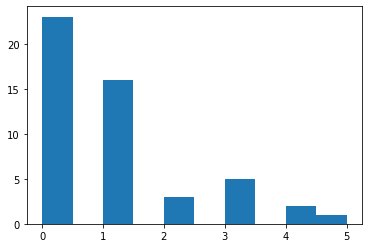

In [25]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

# If running from a text editor or IDE, remember you'll need the following:
# plt.show()

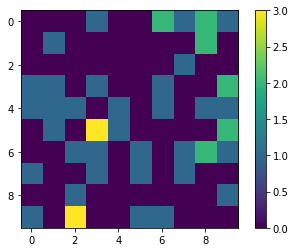

In [26]:
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

# If running from a text editor or IDE, remember you'll need the following:
# plt.show()

In [14]:
for i in range(4):
    print(i%2)

0
1
0
1
